# Pokémon Changes Through the Generations


In [67]:
import kagglehub

# Using the Kaggle API requires a token including a username and key
kagglehub.login() 


In [68]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [85]:
# Download CVS data file from Kaggle and saving the download path to be used later
dataset_path = kagglehub.dataset_download('rounakbanik/pokemon', path='pokemon.csv')


# Can also use the CVS data file included in this repository by uncommenting the line bellow in the notebook
# dataset_path = 'pokemon.csv'

In [86]:
# Makes a list of all different types of Pokémon
types = []
with open(dataset_path, newline='') as data:
    reader = csv.DictReader(data)
    for row in reader:
        types.append(row['type1'])
types = list(set(types))


# Initialize dictionary for generations with corresponding weights
gen_weights  = {str(i): [] for i in range(1, 8)}

# Initialize dictionary for type with corresponding weights            
type_weights = {i: [] for i in types}

# Read CSV and populate the above dictionaries with the weights and respective generation
with open(dataset_path, newline='') as data:
    reader = csv.DictReader(data)
    for row in reader:
        gen = row['generation']
        if gen in gen_weights and row['weight_kg']:
            gen_weights[gen].append(float(row['weight_kg']))
        type = row['type1']
        if type in type_weights and row['weight_kg']:
            type_weights[type].append(float(row['weight_kg']))


## Scatter Plot of all Weights

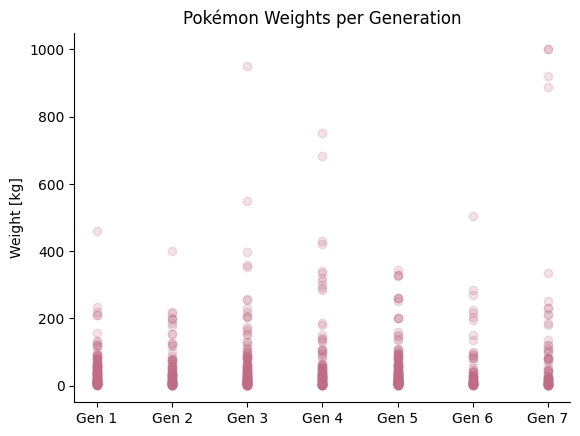

In [87]:
for i in range(1, 8):
    plt.scatter([f'Gen {i}' for j in range(len(gen_weights[str(i)]))], gen_weights[str(i)], color="#C06C84", alpha=0.2) 
    

# Some custumization 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Weight [kg]")
plt.title("Pokémon Weights per Generation")

# plt.legend()
plt.show()

Based on the plot above, it seems like Gen 7 has some heavier Pokémon compared to the other generations. In addition Gen 3 has a heavy one.

## Density plot of weights


In [ ]:
from scipy.stats import gaussian_kde

# Build dummy data
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 8, 200)

# Set the figure size
plt.figure(figsize=(14, 8))

# Make the chart
# We're actually building a line chart where x values are set all along the axis and y value are
# the corresponding values from the density function
plt.plot(xs,density(xs))
plt.show()

## Bar Plot Showing the Average Weights

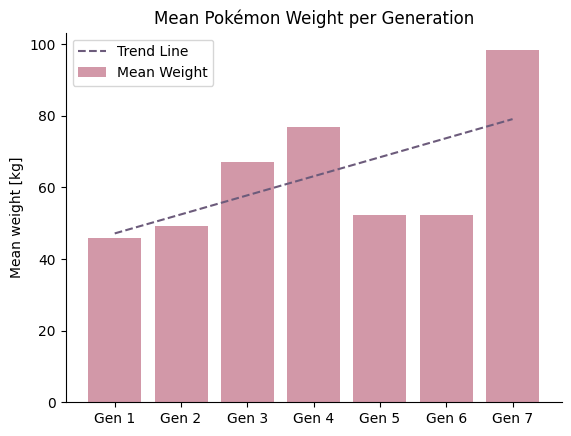

In [88]:
# Function to compute mean
def find_mean(lst):
    if len(lst) != 0:
        return sum(lst) / len(lst)
    else:
        return 0

# Function to compute standard deviation
def find_stdev(lst):
    if len(lst) != 0:
        mean = find_mean(lst)
        variance = sum((x - mean) ** 2 for x in lst) / len(lst)
        return np.sqrt(variance)
    else:
        return 0

# Compute mean weights and standars deviations of the different generations
x_vals = np.arange(1, 8)
means  = [find_mean(gen_weights[str(i)]) for i in range(1, 8)]
stdevs   = [find_stdev(gen_weights[str(i)]) for i in range(1, 8)]

# Fit a linear trend line
coeffs = np.polyfit(x_vals, means, 1)  # Find a fitting linear polynomial and return the coefficients
trend_line = np.poly1d(coeffs)  # Create the polynomial function

# Create x and y values for the plotting of the trend line
x_trend = np.linspace(1, 7, 100)
y_trend = trend_line(x_trend)

# Plot trend line
plt.plot(x_trend, y_trend, color='#6C5B7B', linestyle='--', label="Trend Line")

# Create bar plot of the avg. weights 
plt.bar(x_vals, means, tick_label=[f'Gen {i}' for i in range(1, 8)], color="#C06C84", alpha=0.7, label="Mean Weight")

# Plot errorbars using the standard deviation
# plt.errorbar(x_vals, means, yerr=stdevs, fmt='o', capsize=5, capthick=2, elinewidth=1, color="gray", label="Standard deviation")

# Labels and title
plt.ylabel("Mean weight [kg]")
plt.title("Mean Pokémon Weight per Generation")

# Some custumization 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()







Based on the average weights, it seems like the total trend is that the Pokémon are getting heavier, however, Gens 5 and 6, has an average weight more similar to Gens 1 and 2. The standard deviation for these means can be showed by uncommenting the plt.errorbar line in the notebook, however, it is left oft, as the standard deviation is very large and thus uninformative.

## Bar Plot of the Median Weights

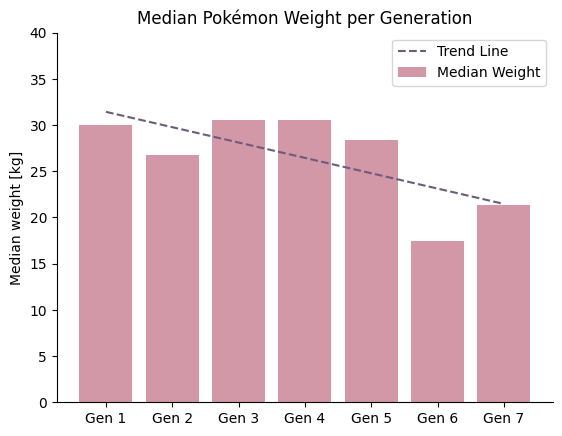

In [89]:
# Calculate the median value depending on wheather the list is odd or even
def find_median(lst):
    if len(lst)%2 == 1:
        lst.sort() # The original list is not sorted making the implemented method not find the correct median
        median = lst[round(len(lst) / 2)]
    elif len(lst)%2 == 0:
        lst.sort()
        median = (lst[int(len(lst) / 2)] + lst[int(len(lst) / 2) - 1]) / 2 # If there is no singular median, the avergave of the two median values are used
    return median


# Compute medial weights og the different generations
x_vals = np.arange(1, 8)
medians = [find_median(gen_weights[str(i)]) for i in range(1, 8)]

# Fit a linear trend line
coeffs = np.polyfit(x_vals, medians, 1)  # Find a fitting linear polynomial and return the coefficients
trend_line = np.poly1d(coeffs)  # Create the polynomial function

# Create x and y values for the plotting of the trend line
x_trend = np.linspace(1, 7, 100)
y_trend = trend_line(x_trend)

# Plot trend line
plt.plot(x_trend, y_trend, color='#6C5B7B', linestyle='--', label="Trend Line")

# Create bar plot of the median weights 
plt.bar(x_vals, medians, tick_label=[f'Gen {i}' for i in range(1, 8)], color="#C06C84", alpha=0.7, label="Median Weight")


# Some custumization 
plt.ylabel("Median weight [kg]")
plt.title("Median Pokémon Weight per Generation")
plt.ylim([0, 40])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()

# Something is wrong here ....

The median weight shows the oposite trend than the mean, showed earlier. However, the difference in weight between the median is much smaller than that of the mean, showing an overall smaller change of median weight between the different generations.

## Population over 400 kg

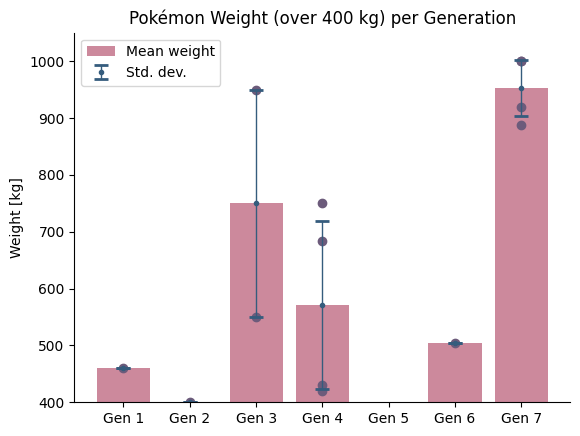

In [90]:

# Function to filter Pokémon that are 400 kg or more
def filter_heavy_pokemon(gen_weights, max_weight=400):
    return {gen: [weight for weight in weights if weight >= max_weight] for gen, weights in gen_weights.items()}


# Filter Pokémon
filtered_gen_weights = filter_heavy_pokemon(gen_weights)
filtered_gen_weights["5"] = []  # If no Pokémon in Gen 5 meet criteria, use empty list

# Compute mean weights per generation
heavy_means = [find_mean(filtered_gen_weights[str(i)]) for i in range(1, 8)]

# Compute standard deviations 
heavy_stdevs = [find_stdev(filtered_gen_weights[str(i)]) for i in range(1, 8)]

# X-axis labels
x_vals = [f'Gen {i}' for i in range(1, 8)]

# Plot bar chart of mean weights
plt.bar(x_vals, heavy_means, color="#C06C84", alpha=.8, label = "Mean weight")

# Error bar showing the standard deviation of the mean    
plt.errorbar(x_vals, heavy_means, yerr=heavy_stdevs, fmt='.', capsize=5, capthick=2, elinewidth=1, color="#355C7D", label="Std. dev.")

# Scatter plot of all Pokémon weights per generation
for i in range(1, 8):
    plt.scatter([f'Gen {i}' for _ in filtered_gen_weights[str(i)]], filtered_gen_weights[str(i)], color="#6C5B7B")


# Customization
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(400, 1050)
plt.ylabel("Weight [kg]")
plt.title("Pokémon Weight (over 400 kg) per Generation")
plt.legend()



This plot only considers the Pokémon over 400 kg. Here it is clear that Gen 7 has the heaviest Pokémon, with Gen 3 being the generation with the second heaviest Pokémon. Based on the mean and standard deviation, it does seem like Gen 7 have a higher concentration of heaviness past the 400 kg mark, that the others.

## Total Weight

Text(0.5, 1.0, 'Total Pokémon Weight Distribution by Generation')

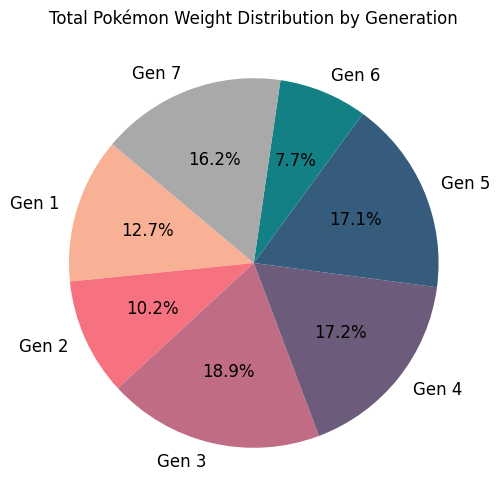

In [91]:
# Makes dictionary to with the total weights of each generation
total_weights = {gen: sum(weights) for gen, weights in gen_weights.items()}
# Define custom color palette with grey and purple tones
colors = ["#F8B195", "#F67280", "#C06C84", "#6C5B7B", "#355C7D", "#138086", "#a9a9a9"]
    
# Extracting labels and values for the pie chart
labels = [f'Gen {i}' for i in range(1, 8)]
values = list(total_weights.values())

# Plotting the pie chart with custumizations 
plt.figure(figsize=(6, 6)) # Specifying the figure size as the default is a bit small
plt.pie(values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=140, colors=colors)
plt.title("Total Pokémon Weight Distribution by Generation")



The pie chart above does not give us a lot of information except that Gen 6 has both a low total weight and a low average weight. Otherwise the total amout of Pokémon seems to be quite similar.

## Correlation between weight and height/type/something

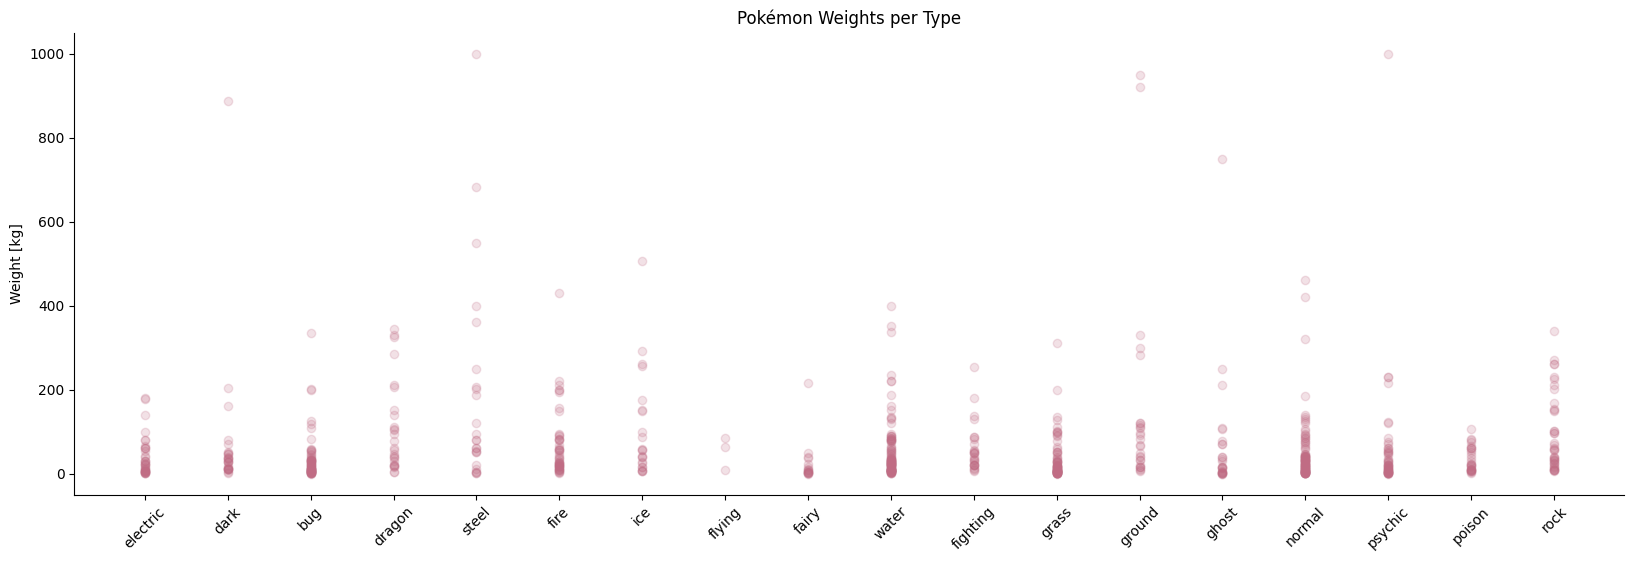

In [92]:
# Plot Pokémon Weights per Type
plt.figure(figsize=(20, 6))  # Set figure size

for type_name in types:
    plt.scatter(
        [type_name] * len(type_weights[type_name]),  # Use type names
        type_weights[type_name],
        color="#C06C84",
        alpha=0.2
    )

# Customization
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Weight [kg]")
plt.title("Pokémon Weights per Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# # Load data
# weights = []
# generations = []
# types = []
# with open(dataset_path, newline='') as data:
#     reader = csv.DictReader(data)
#     for row in reader:
#         if row['weight_kg'] and row['generation'] and row['type1']:
#             weights.append(float(row['weight_kg']))
#             generations.append(int(row['generation']))
#             types.append(row['type1'])

# Create DataFrame
df = pd.DataFrame({"Weight": weights, "Generation": generations, "Type": types})

# Pivot table to get mean weights by type and generation
df_pivot = df.pivot_table(values='Weight', index='Generation', columns='Type', aggfunc='mean')

# Compute correlation matrix
corr_matrix = df_pivot.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Pokémon Weights by Type')
plt.show()


ValueError: All arrays must be of the same length

In [97]:
# Prepare the dataset from the provided data

import pandas as pd
from io import StringIO

# Convert the dictionaries into a format suitable for correlation computation
# For generation, we'll average the weights for each generation
gen_averages = {gen: np.mean(weights) for gen, weights in gen_weights.items() if weights}

# For type, we'll average the weights for each type
type_averages = {type_: np.mean(weights) for type_, weights in type_weights.items() if weights}

# Create a dataframe to hold the correlation data
# We'll create a list of Pokémon (by type and generation) with their average weights
data_for_correlation = []

# Add data for generation correlations
for gen, avg_weight in gen_averages.items():
    data_for_correlation.append([avg_weight, int(gen), 'generation'])

# Add data for type correlations
for type_, avg_weight in type_averages.items():
    data_for_correlation.append([avg_weight, None, type_])

# Convert to a pandas DataFrame
df_for_correlation = pd.DataFrame(data_for_correlation, columns=['weight_kg', 'generation', 'type'])

# Calculate correlation matrix (ignoring missing values)
correlation_matrix = df_for_correlation.corr()


ValueError: could not convert string to float: 'generation'